In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/cavin/Desktop/TBA3222 Marketing Analytics Assignment/customer_shopping_data.csv')
df.head()

,CustomerID,Gender,Age,Annual_Income_k$,Average_Spending_$
0,10001,Female,36,85,75
1,10002,Male,37,78,1
2,10003,Female,35,18,6
3,10004,Male,48,77,36
4,10005,Female,20,16,6


In [3]:
#Q1
# define data quality report

def data_quality_report(df):
    
    if isinstance(df, pd.core.frame.DataFrame):
        
        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types], axis=0)
        
        return data_report
    
    else:
    
        return None

# generate data quality report

print(data_quality_report(df))

          CustomerID  Gender     Age Annual_Income_k$ Average_Spending_$
count            200     200     200              200                200
unique           NaN       2     NaN              NaN                NaN
top              NaN  Female     NaN              NaN                NaN
freq             NaN     112     NaN              NaN                NaN
mean         10100.5     NaN   38.85            60.56               50.2
std          57.8792     NaN  13.969          26.2647            25.8235
min            10001     NaN      18               15                  1
25%          10050.8     NaN   28.75             41.5              34.75
50%          10100.5     NaN      36             61.5                 50
75%          10150.2     NaN      49               78                 73
max            10200     NaN      70              137                 99
Data Type      int64  object   int64            int64              int64


In [4]:
#Q1 cont'd-2
#mode for categorical feature

df.loc[:, df.columns != 'CustomerID'].mode()

,Gender,Age,Annual_Income_k$,Average_Spending_$
0,Female,32.0,54,42.0
1,NaN,NaN,78,NaN


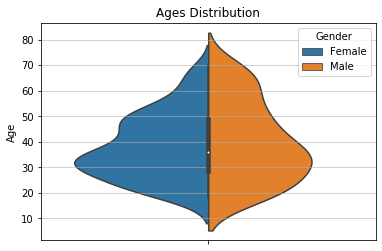

In [5]:
#Q1 cont'd-3
#Age distribution by gender

df["x"]=""

sns.violinplot(x = 'x', y='Age', data = df, hue='Gender', split=True)
plt.title("Ages Distribution")
plt.grid(axis='y', alpha=0.7)
plt.xlabel("")
plt.show()

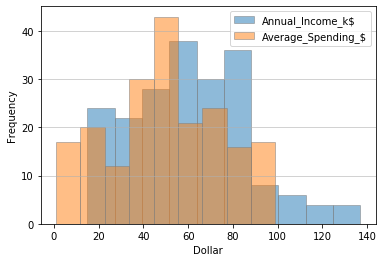

In [6]:
#Q1 cont'd-4
#Income and spending distribution

plt.hist(x=df["Annual_Income_k$"], bins= 'auto', alpha = 0.5, edgecolor="grey", label='Annual_Income_k$' )
plt.hist(x=df["Average_Spending_$"], bins= 'auto', alpha = 0.5, edgecolor="grey", label='Average_Spending_$'  )
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.7)
plt.xlabel('Dollar')
plt.ylabel('Frequency')
plt.show()

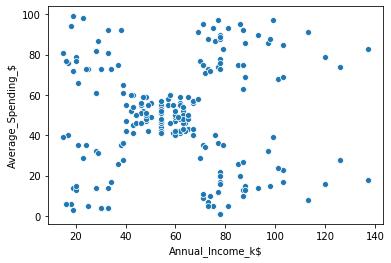

In [8]:
df_km = df[['Annual_Income_k$','Average_Spending_$']]

sns.scatterplot(data=df_km, x="Annual_Income_k$", y="Average_Spending_$")
plt.show()

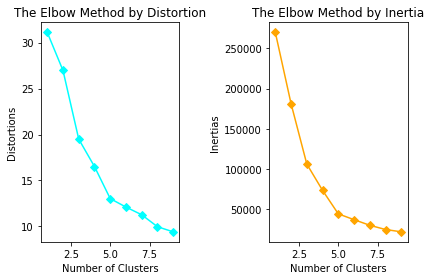

In [9]:
#Q2
#Elbow method to select number of clusters

from scipy.spatial.distance import cdist

df_km = df[['Annual_Income_k$','Average_Spending_$']]

distortions = []
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(df_km)
    kmeans.fit(df_km)
    distortions.append(sum(np.min(cdist(df_km, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_km.shape[0])
    inertias.append(kmeans.inertia_)


plt.subplot(1,2,1)
plt.plot(range(1,10),distortions, color="Cyan", marker ="D")
plt.ylabel("Distortions")
plt.xlabel("Number of Clusters")
plt.title('The Elbow Method by Distortion')

plt.subplot(1,2,2)
plt.plot(range(1,10),inertias, color="Orange", marker ="D")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias")
plt.title('The Elbow Method by Inertia')

plt.tight_layout()
plt.show()

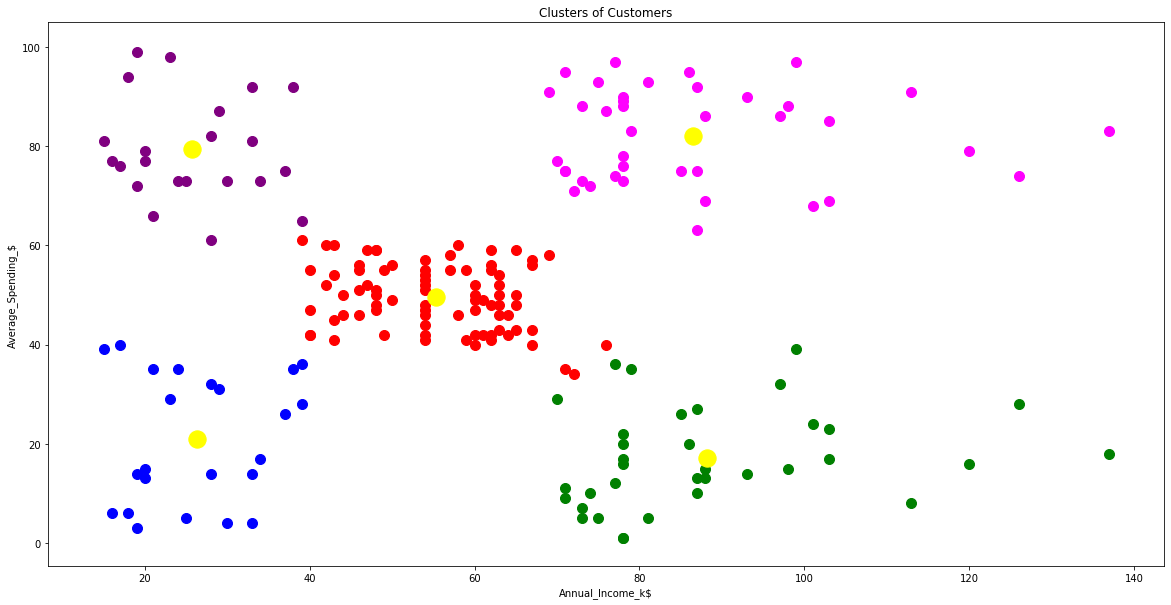

In [10]:
#Q2 Cont'd 2
#We can conclude number of clusters (elbow) is 5 from the above elbow graph

kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(df_km)

#Visualising the clusters
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df_km["Annual_Income_k$"][y_kmeans == 0], df_km["Average_Spending_$"][y_kmeans == 0], c='magenta', s=100, label ='Cluster 1')
ax.scatter(df_km["Annual_Income_k$"][y_kmeans == 1], df_km["Average_Spending_$"][y_kmeans == 1], c='red', s=100, label ='Cluster 2')
ax.scatter(df_km["Annual_Income_k$"][y_kmeans == 2], df_km["Average_Spending_$"][y_kmeans == 2], c='green', s=100, label ='Cluster 3')
ax.scatter(df_km["Annual_Income_k$"][y_kmeans == 3], df_km["Average_Spending_$"][y_kmeans == 3], c='blue', s=100, label ='Cluster 4')
ax.scatter(df_km["Annual_Income_k$"][y_kmeans == 4], df_km["Average_Spending_$"][y_kmeans == 4], c='Purple', s=100, label ='Cluster 5')

#Plot the centroid

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel("Annual_Income_k$")
plt.ylabel("Average_Spending_$")
plt.show()